In [8]:
# %load ~/los_projectados/framework_for_labs/scripts/python_lib.py
#!/usr/bin/env python3

import sys
import os
import numpy as np
import subprocess
import pandas as pd
import pyperclip
import math
import matplotlib.pyplot as plt

def build_graph (X:np.array, Y:np.array, x_name:str, y_name:str, x_dim:str = '', y_dim:str = '', name:str = '', no_line:bool = True, color:str = 'black', color_dot:str = 'blue', include_zero:bool = False, dx:np.array = np.array ([]), dy:np.array = np.array ([]), function:str='none', aprx_l=0, aprx_r=-1, figure=0, line_name=0, aprx_only=False):

    k = -1.0
    b = -1.0

    xlim = min (X) * 0.9
    ylim = min (Y) * 0.8
    if (include_zero):
        xlim = min (xlim, 0)
        ylim = min (ylim, 0)

    ax1 = 0
    if (figure == 0):
        fig = plt.figure (figsize=(16, 9), dpi=200)
        ax1 = fig.add_subplot (111)
    else:
        fig = figure
        ax1 = fig.axes[0]
    # ax1 = fig.add_subplot (111)
    ax1.set_title (rf'{name}', fontsize=17)
    if (no_line == False): ax1.plot (X, Y, color = color, linestyle = '-', markersize=0, linewidth=0.5)
    if (aprx_only == False):
        if (line_name == 0):ax1.scatter (X, Y, label = rf'{y_name}({x_name})', color = color_dot, marker='+', s=50, linewidths=1)
        else: ax1.scatter (X, Y, label = rf'{y_name}({x_name})' + '  : ' + line_name, color = color_dot, marker='+', s=50, linewidths=1)

    if function == 'lin':
        if (aprx_r == -1):
            aprx_r = len (X)
        model = np.poly1d (np.polyfit (X[aprx_l:aprx_r], Y[aprx_l:aprx_r], deg = 1))
        approx = rf'$({str (model[1])}) * x + ({str (model[0])})$' + '  : ' + str (line_name)
        k = float (model[1])
        b = float (model[0])
        x_range = np.linspace (min(X) * 0.9, max (X) * 1.1, 2)
        ax1.plot (x_range, model (x_range), '--', color = 'orange', label = approx)

    ax1.set_xlabel (rf'{x_name}, {x_dim}', size=20)
    ax1.set_ylabel (rf'{y_name}, {y_dim}', size=20)
    ax1.set_xlim (xlim, max (X) * 1.1)
    ax1.set_ylim (ylim, max (Y) * 1.2)
    ax1.legend (fontsize=14)
    ax1.grid ()
    return (fig, (k, b))



#write_as_column - outputs as table column
#vertical=True - outputs a transponded version
#vertical=False - outputs a non transponded version
#if total_rows > amount of resulting rows then add empty elements
#if total_columns > amount of resulting columns then add empty columns
def arr_to_tex (arr:np.ndarray, outfile:str = '/dev/null', append:bool = False, to_clip:bool = False, precision=2, as_column:bool=False, vertical:bool=False, header:bool=True, col_total:int=0, row_total:int=0, caption:str = ''):
    tex_out =''
    if (header):
        tex_out += '\n\\begin{table}[H]\n\\caption{' + caption + '}\n\\begin{center}\n\\begin{tabular}{|c|*{15}{c|}}\\hline\n'

    if (arr.ndim == 1):
        for i in arr:
            if (isinstance (i, str)): tex_out += i
            else: tex_out += str (round (i, precision))
            tex_out += ' & '
            if (as_column): tex_out += '\n'
        if (as_column): tex_out += ' & \n' * max (0, row_total - len (arr))
        else: tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - len (arr)) + '\\\\\\hline\n'
    elif (arr.ndim == 2):
        if (vertical):
            row_n = arr.shape[0]
            col_n = arr.shape[1]
            for i in range (row_n):
                for j in range (col_n):
                    if (isinstance (arr[j][i], str)): tex_out += arr[j][i]
                    else: tex_out += str (round (arr[j][i], precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total
        else:
            row_n = arr.shape[1]
            col_n = arr.shape[0]
            for i in arr:
                for j in i:
                    if (isinstance (j, str)): tex_out += j
                    else: tex_out += str (round (j, precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total

    if (header): tex_out += '\\end{tabular}\n\\end{center}\n\\end{table}\n\n'

    if (to_clip):
        clip_content = ''
        if (append): clip_content = pyperclip.paste ()
        clip_content += tex_out
        pyperclip.copy (clip_content)

    open_str = 'w'
    if (append): open_str = 'a'

    with open (outfile, open_str) as output:
        print (tex_out, file = output)


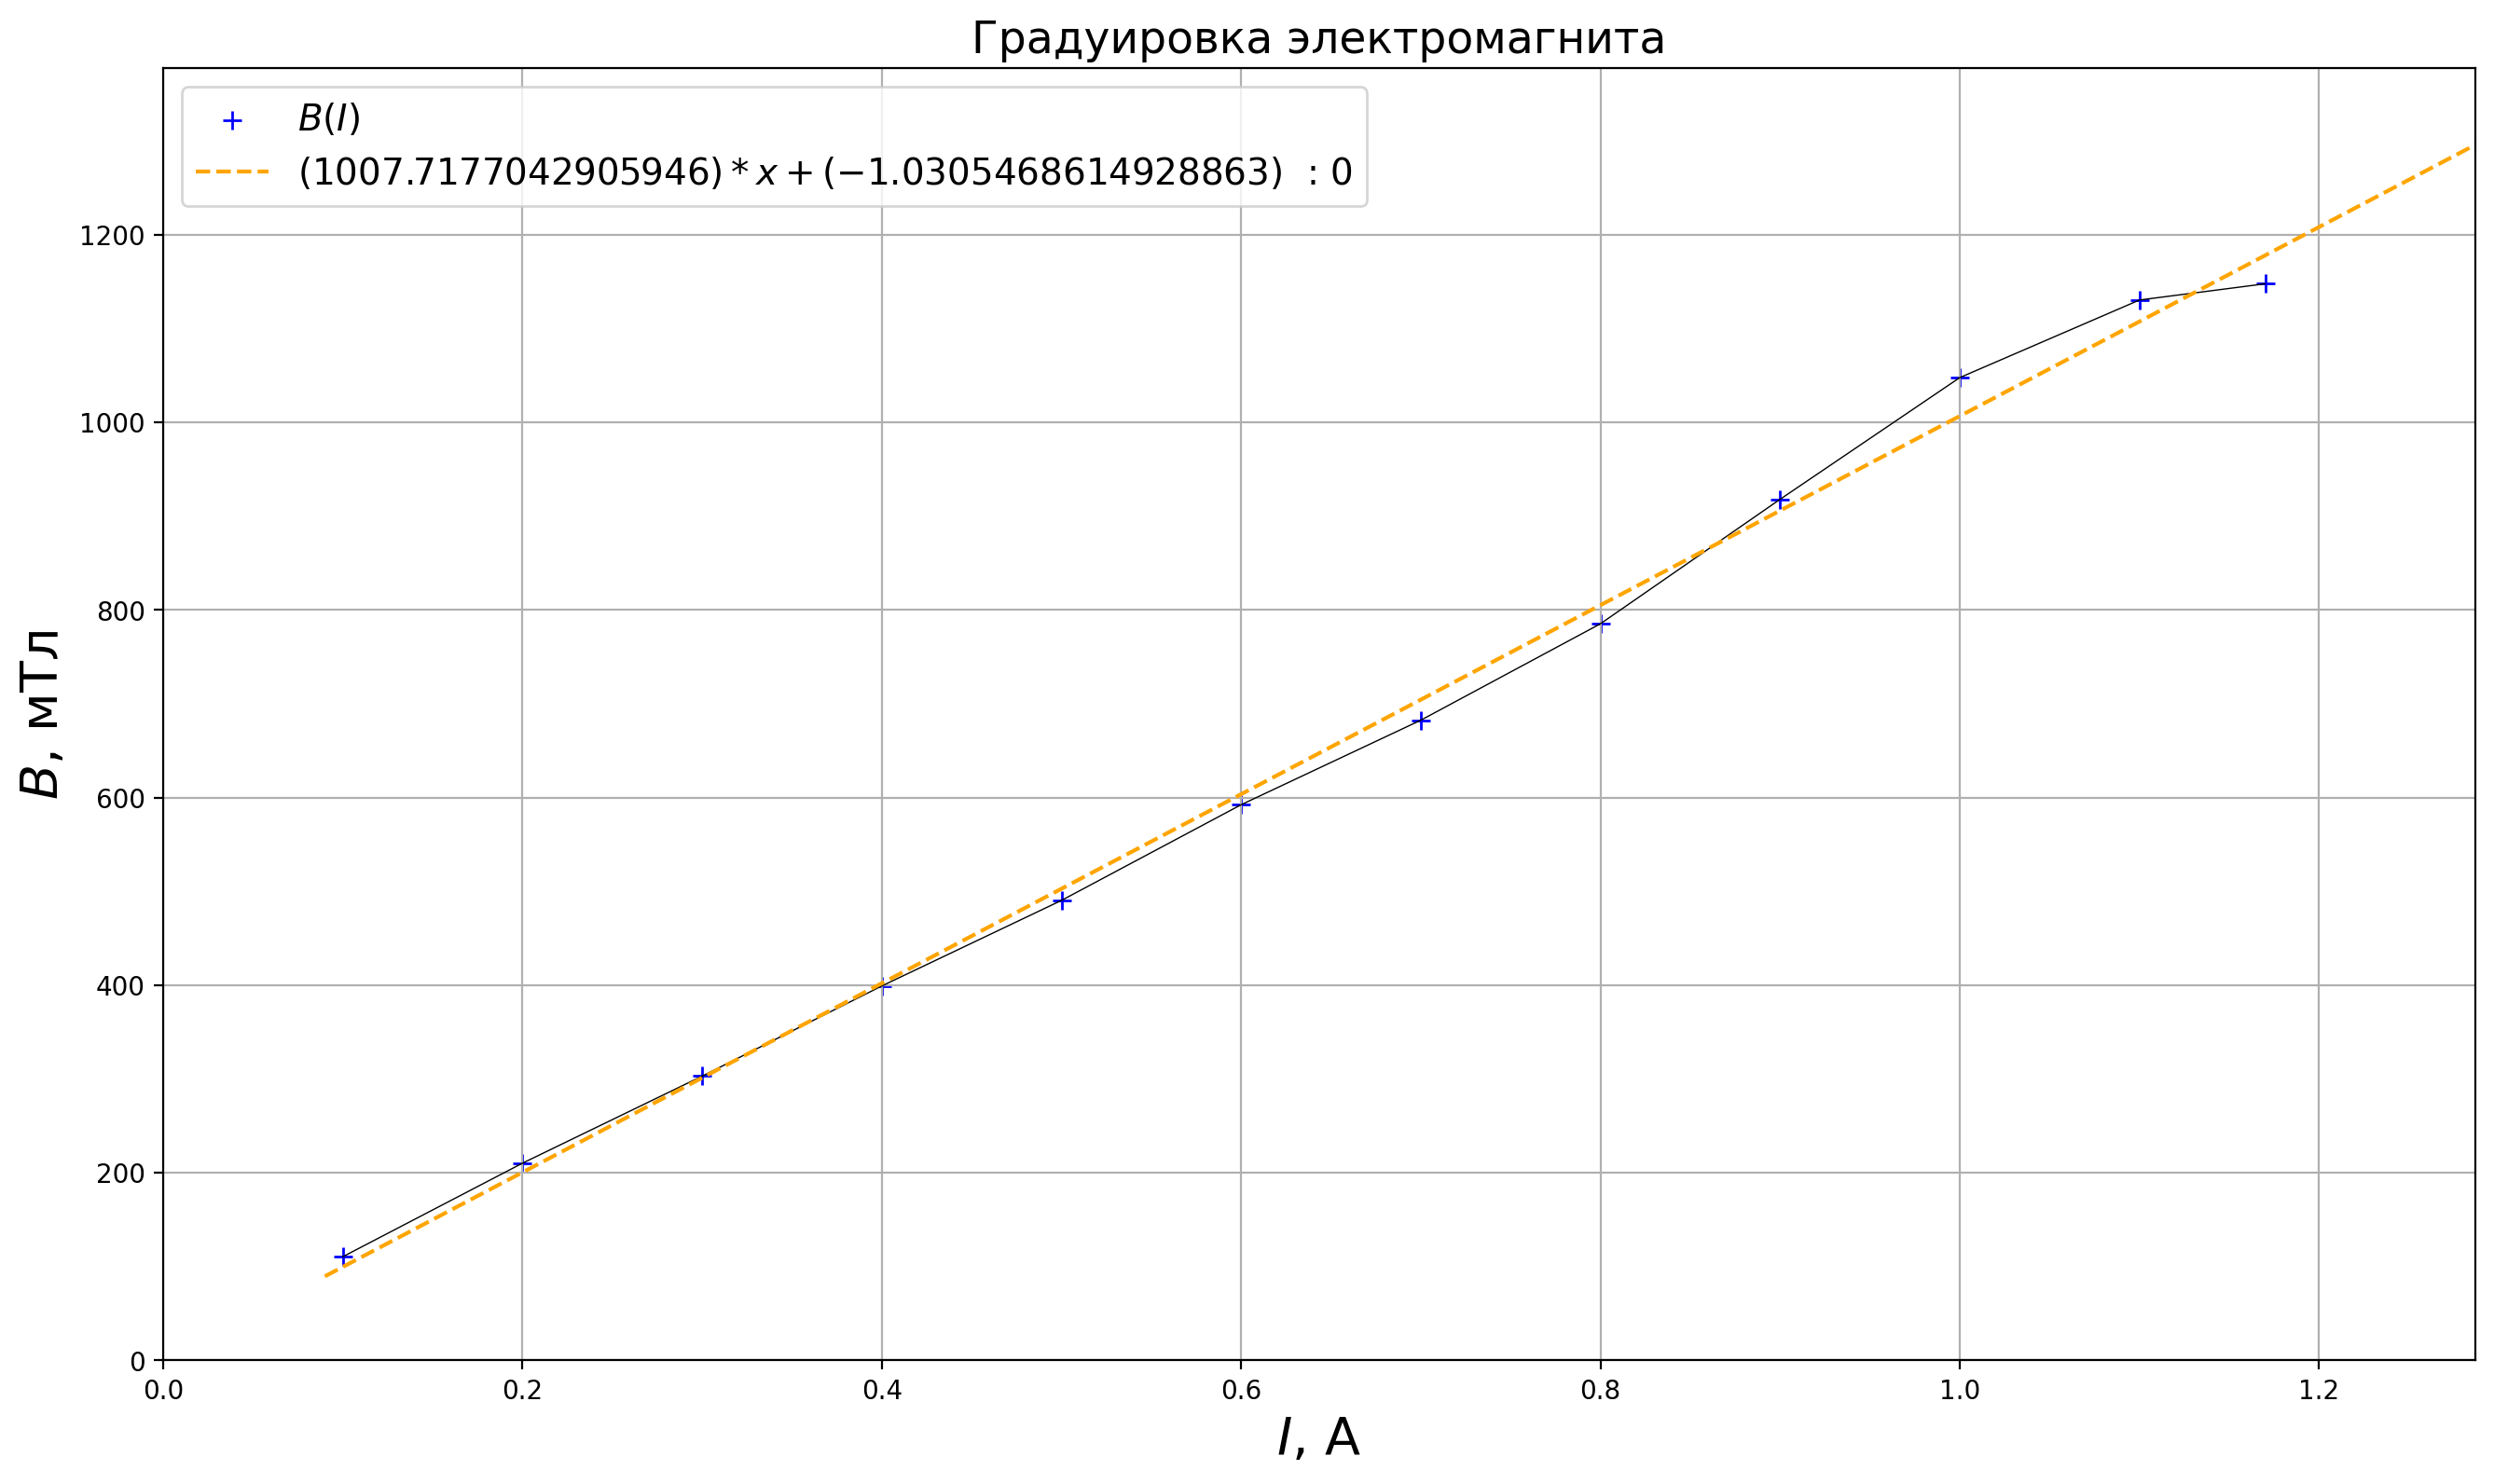

In [9]:
I = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.17]
B = [110.6 ,210.3 ,303.1 ,399.2 ,490.4 ,592.4 ,682.5 ,785.3 ,918 ,1047.7 ,1130.4 ,1147.7]

(fig, (k, b)) = build_graph (I, B, r'$I$', r'$B$', x_dim=r'А', y_dim=r'мТл', name='Градуировка электромагнита', no_line=False, include_zero=True, function='lin')

plt.show ()
# fig.savefig ('pics/Graduation.png')

[ 0.1014049   0.4056196   0.9126441   1.6224784   2.5351225   3.6505764
  4.9688401   6.4899136   8.2137969  10.14049    12.2699929  13.88131676
 12.2699929  10.14049     8.2137969   6.4899136   4.9688401   3.6505764
  2.5351225   1.6224784   0.9126441   0.4056196   0.1014049 ]


(2.406888912082983, 5.341351251170359)

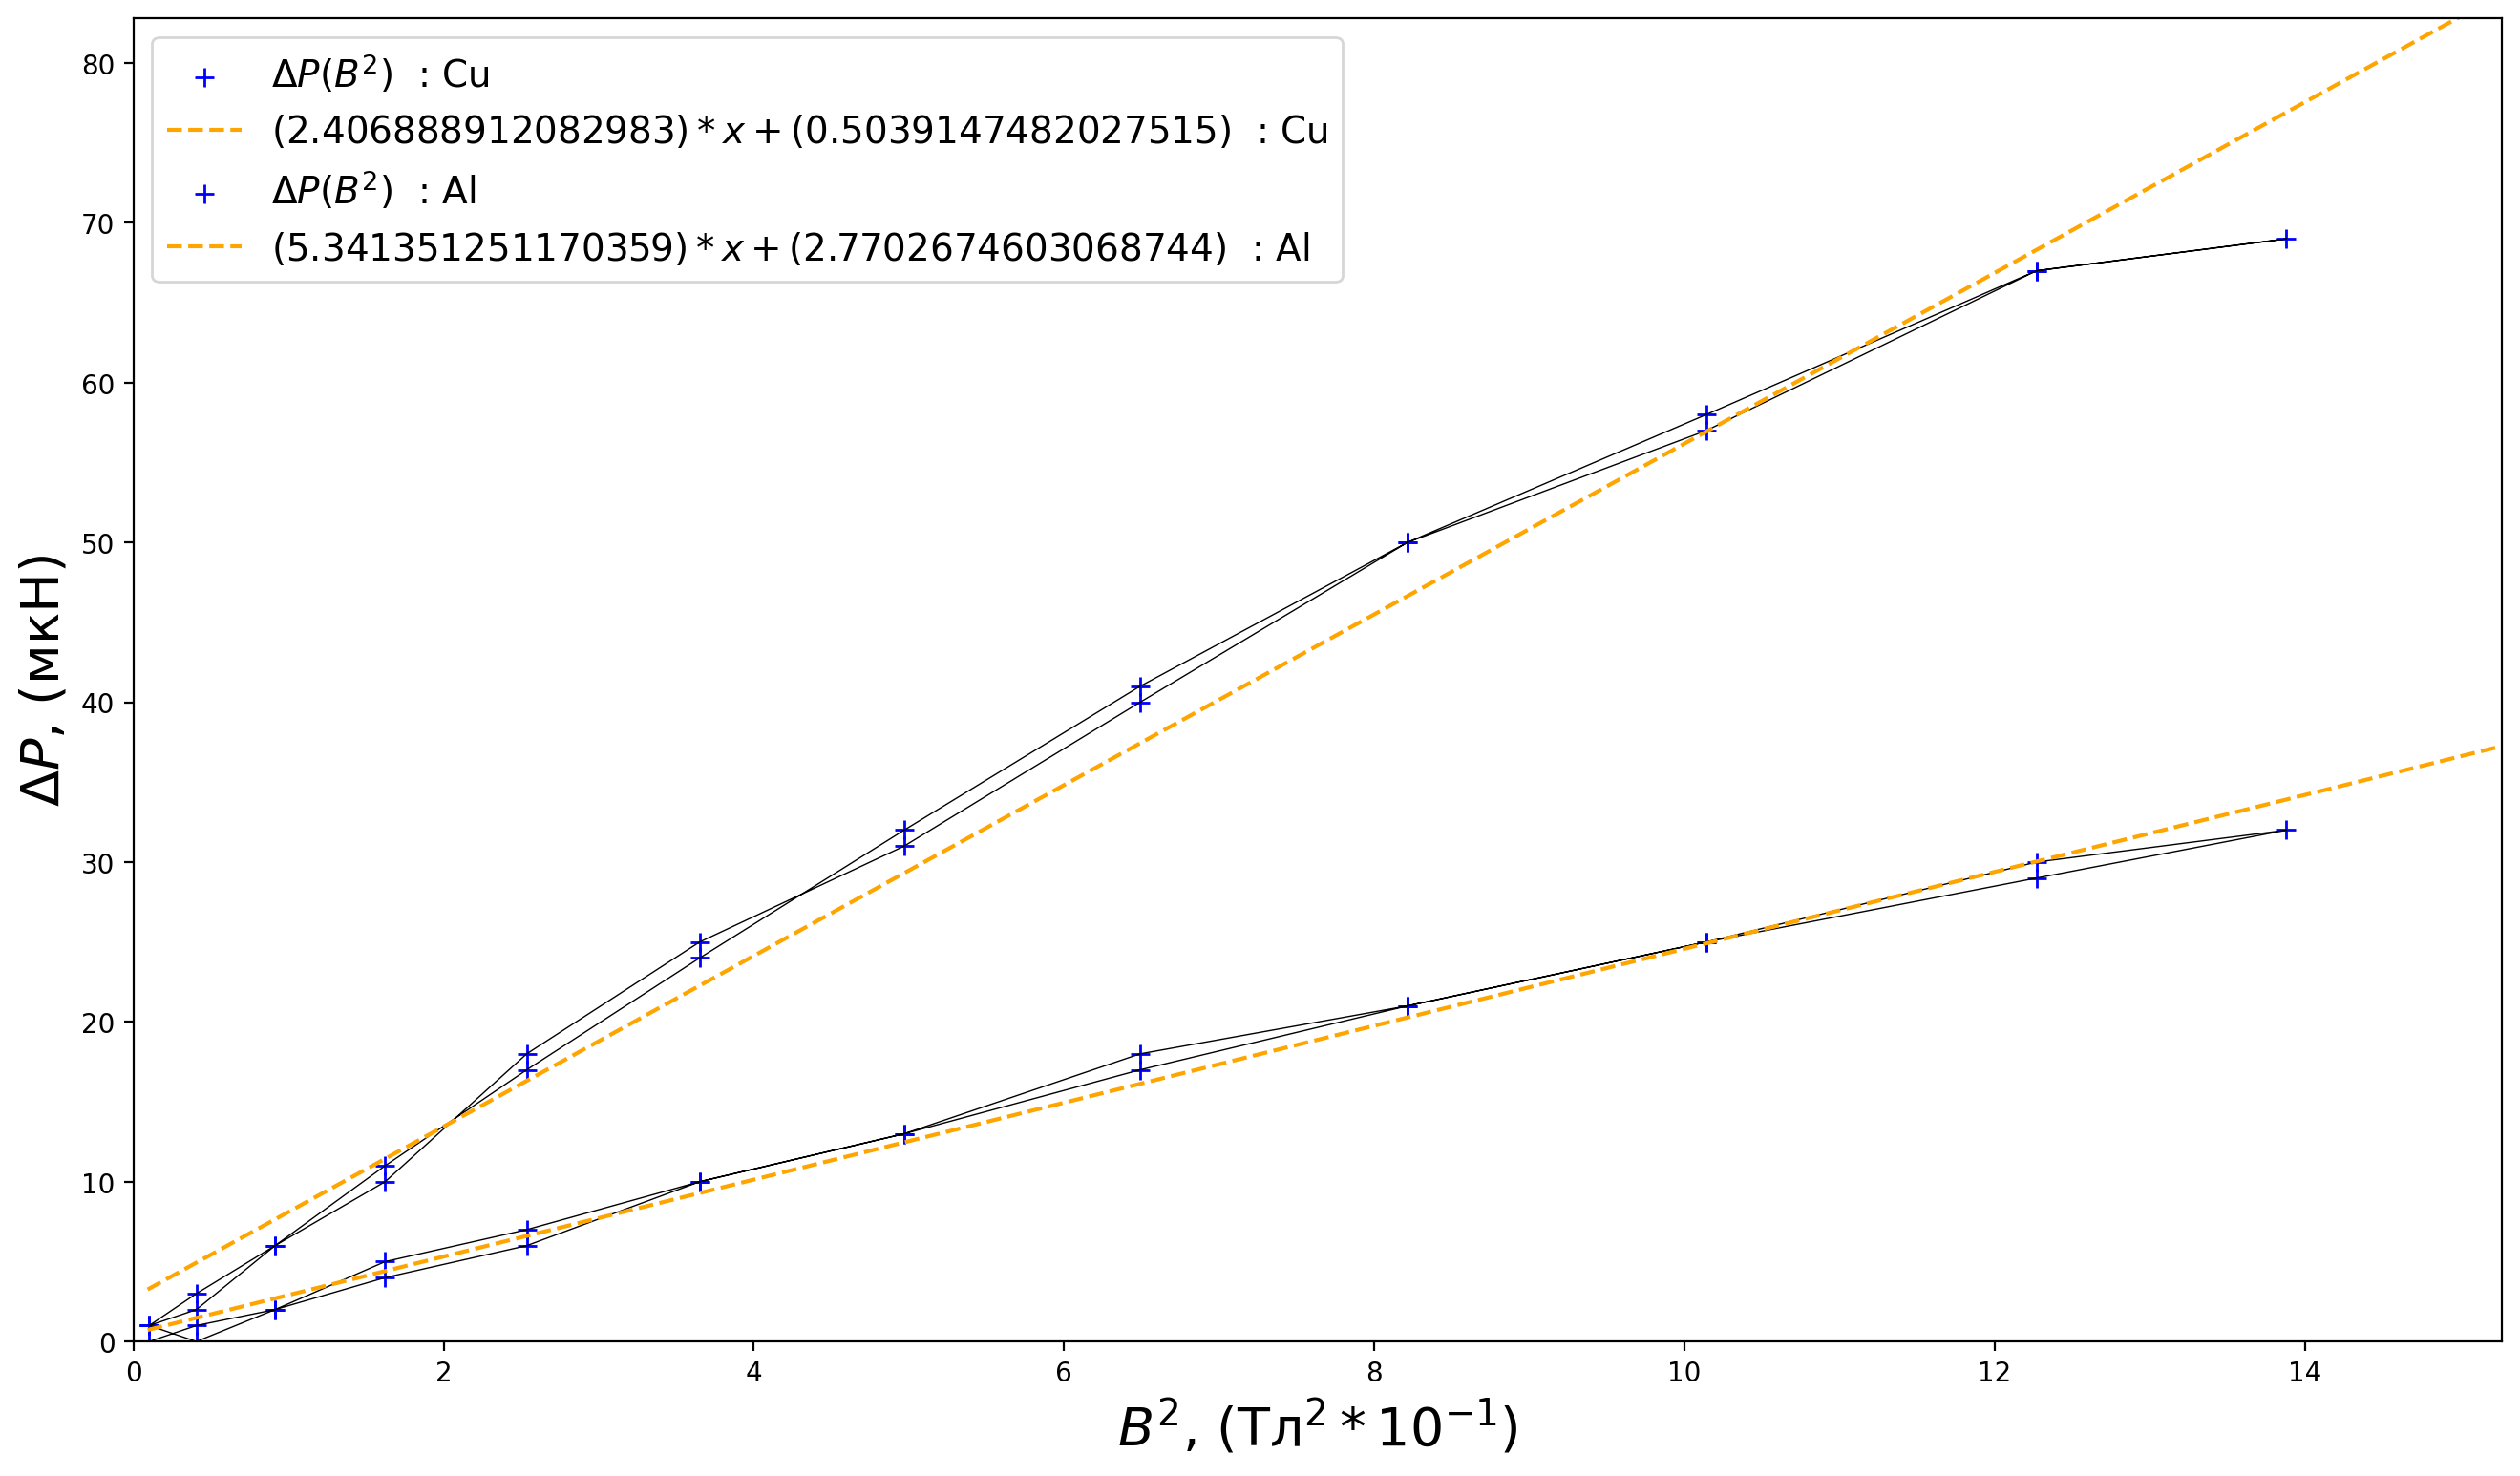

In [11]:
I_cu = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.17, 1.1, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cu = [0, -1, -2, -5, -7, -10, -13, -17, -21, -25, -30, -32, -29, -25, -21, -18, -13, -10, -6, -4, -2, 0, 1]
cu = np.abs (cu)

I_al = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.17, 1.1, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
al = [1, 3, 6, 11, 17, 24, 32, 41, 50, 58, 67, 69, 67, 57, 50, 40, 31, 25, 18, 10, 6, 2, 1]

B_cu = (1.007 * np.array (I_cu))**2 * 10
print (B_cu)
B_al = (1.007 * np.array (I_al))**2 * 10

(fig, (k1, b1)) = build_graph (B_cu, cu, r'$B^2$', r'$\Delta P$', r'$(\text{Тл}^2*10^{-1})$', r'(мкН)', include_zero=True, function='lin', no_line=False, line_name='Cu')
(fig, (k2, b2)) = build_graph (B_al, al, r'$B^2$', r'$\Delta P$', r'$(\text{Тл}^2*10^{-1})$', r'(мкН)', include_zero=True, function='lin', no_line=False, figure=fig, line_name='Al')

fig.savefig ("pics/graph.png")

k1, k2